# Chinese Stock Indices Analysis

### Abstract 

The stock markets of emerging market play more important roles in global finacial market. China is one of the largest countries worldwide with a real GDP growth of more than 6%. This report will analyse the relationship between china stock market capitalization to GDP ratio and Shanghai Composite Index from 1999 to 2015. Both regression and kNN models to predict daily returns (daily price changes) of a particular stock index based on certain predictors will be built and discussed in details as well.   

### Introduction 

As far as we know, there are 3 major stock indices in U.S stock market, which are Dow Jones Industrial Average (DJIA), Standard & Poor's 500 (S&P 500), and  NASDAQ-100. The counterparts of these 3 indices in China stock market are Shanghai Stock Exchange 50 (SSE 50 Index)，China Securities Index Company 300 (CSI 300 Index) and Growth Enterprise Index (GEI). SSE 50 Index selects 50 largest stocks of good liquidity and representativeness from Shanghai security market similar to DJIA of U.S. CSI 300 Stock Index (CSI 300), the first equity index jointly launched by the Shanghai Stock Exchange and the Shenzhen Stock Exchange, aims to reflect the price fluctuation and performance of China’s top 300 shares by market capitalization, similar to S&P 500 of U.S. The Growth Enterprise Index (GEI) is made up of 100 largest new business companies in China Growth Market. This report will analyse the price change of SSE 50 Index (referred as c_DJIA), CSI 300 Index (referred as c_SP500) and Growth Enterprise Index (referred as c_NASDAQ).

This report will seek to answer the following questions:
    
    1.) What was the relationship between china GDP and stock indices?
    2.) How to build linear regression model to predict daily returns of stock indices?
    3.) How to build polynomial and multiple linear regression model to predict daily returns of stock indices?
    4.) How to build kNN regressor model model to predict daily returns of stock indices?
    
The annual histocrical GDPs of china are grabbed from web page. Below is the link. https://en.wikipedia.org/wiki/Historical_GDP_of_China.

The annual histocrical data of Shanghai Composite Index and total market captalization from 1999 to 2015 is provided from static dataset named total_market_capitalization.xlsx which is exported from one china stock app.

The daily historical data of three indices from 28/08/2013 to current date is provided from web API https://github.com/waditu/tushare which is a utility for crawling historical data of China stocks.

### Q1 - What was the relationship between china GDP and stock indices?

The stock market capitalization to GDP ratio is a ratio used to determine whether an overall market is undervalued or overvalued. This ratio is a long-term valuation indicator that has become popular in recent years, thanks to Warren Buffett. Back in 2001 he remarked in a Fortune Magazine interview that "it is probably the best single measure of where valuations stand at any given moment." The result of this ratio calculation is the percentage of GDP that represents stock market value. Typically, a result of greater than 100% is said to show that the market is overvalued, while a value of around 50%, which is near the historical average for the U.S. market, is said to show undervaluation. In china stock market, however, determining what percentage level is accurate in showing undervaluation and overvaluation has been debated. This report will analyse the relationship between china stock market capitalization to GDP ratio and Shanghai Composite Index from 1999 to 2015.

Firstly, we grab historical GDP data of China from wiki page and load the data into a dataframe called df_gdp.

In [2]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#we first need to make some extra imports
import json
from time import sleep
from datetime import datetime

#you might need to set the proxies if you are doiung this from Massey's domain
#if the below does not work, then try this: "http://get-proxy.massey.ac.nz/"
massey_proxies = {
  "http": "http://alb-cache1.massey.ac.nz/",
 "https": "http://alb-cache1.massey.ac.nz/",
}

massey_proxies = ""

url = "https://en.wikipedia.org/wiki/Historical_GDP_of_China"
response = requests.get(url, proxies=massey_proxies)
response

<Response [200]>

In [5]:
page = response.content
scraping = BeautifulSoup(page, "lxml") 
scraping
scraping_html_table = BeautifulSoup(response.content)
scraping_html_table_GDP = scraping.find_all("table", "wikitable")
scraping_html_table_GDP
df = pd.read_html(str(scraping_html_table_GDP))
df[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,China's Historical GDP for 1952 \u2013present[...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,year,GDP,GDP per capita (GDPPC) based on mid-year popul...,Reference index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GDP in billions,real\ngrowth\n(%),GDPPC,real\ngrowth\n(%),Mid-year\npopulation\nin thousands,exchange rate\n1 foreign currency to CNY,NaN,NaN,NaN,NaN,NaN,NaN
3,CNY,USD,PPP\n(Int'l$.),CNY,USD,PPP\n(Int'l$.),USD 1,Int'l$. 1\n(PPP),NaN,NaN,NaN,NaN
4,p2015,68550.60,11006.13,19437.05,6.9,49992,8027,14175,6.4,1371220.0,6.2284,3.5268


In [6]:
df[0].tail()

,0,1,2,3,4,5,6,7,8,9,10,11
63,1956,103.07,39.58,NaN,15.0,166,64,NaN,12.6,621470.0,2.6040,NaN
64,1955,91.16,35.01,NaN,6.9,150,58,NaN,4.6,608660.0,2.6040,NaN
65,1954,85.98,33.02,NaN,4.3,144,55,NaN,1.9,595310.0,2.6040,NaN
66,1953,82.44,31.66,NaN,15.6,142,54,NaN,13.5,581390.0,2.6040,NaN
67,1952,67.91,30.55,NaN,NaN,119,54,NaN,NaN,568910.0,2.2227,NaN


In [7]:
# extraction and cleaning of data of historical GDP
df_gdp_raw = df[0]
df_gdp_raw_2=df_gdp_raw[4:21]
df_gdp_raw_3 = df_gdp_raw_2[[0,1,4]]
df_gdp_raw_3.iat[0,0] = '2015'
df_gdp_raw_3.iat[1,0] = '2014'
df_gdp_raw_3.rename(columns={0:'Year'}, inplace=True)
df_gdp_raw_3.rename(columns={1:'GDP'}, inplace=True)
df_gdp_raw_3.rename(columns={4:'GrowthRate'}, inplace=True)
df_gdp_raw_4 = df_gdp_raw_3.apply(pd.to_numeric)
df_gdp_raw_5 = df_gdp_raw_4.set_index(['Year'])
df_gdp = df_gdp_raw_5.sort_index(axis=0, ascending=True)
print df_gdp

D:\Anaconda2\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


           GDP  GrowthRate
Year                      
1999   9056.44         7.7
2000  10028.01         8.5
2001  11086.31         8.3
2002  12171.74         9.1
2003  13742.20        10.0
2004  16184.02        10.1
2005  18731.89        11.4
2006  21943.85        12.7
2007  27023.23        14.2
2008  31951.55         9.7
2009  34908.14         9.4
2010  41303.03        10.6
2011  48930.06         9.5
2012  54036.74         7.9
2013  59524.44         7.8
2014  64397.40         7.3
2015  68550.60         6.9


Secondly, we grab annual histocrical data of Shanghai Composite Index and total market captalization from 1999 to 2015 and load the data into a dataframe called df_totalCap.

In [8]:
df_totalCap = pd.read_excel("total_market_capitalization.xlsx","Sheet1",index_col="Year",na_values=["NA"])
df_totalCap.head()

,total_market_captalization,Shanghai_composite_index
Year,,
1999,1458.086840,1366.58
2000,2688.509481,2073.47
2001,2722.797736,1645.97
2002,3263.243494,1357.65
2003,2975.186300,1497.04


Thirdly, we integrate these two dataframes of df_gdp and df_totalCap by concatenating them horizontally. Then we caculate the stock market capitalization to GDP ratio based on gdp and total_market_captalization columns.

In [9]:
df_gdp_tatalCap = pd.concat([df_gdp, df_totalCap], axis=1)
s_totalCap_gdp_ratio = df_gdp_tatalCap['total_market_captalization']/df_gdp_tatalCap['GDP']
s_totalCap_gdp_ratio.name = 'totalCap_gdp_ratio'
df_totalCap_gdp_ratio = pd.concat([df_gdp_tatalCap, s_totalCap_gdp_ratio], axis=1)
df_totalCap_gdp_ratio.head()

,GDP,GrowthRate,total_market_captalization,Shanghai_composite_index,totalCap_gdp_ratio
Year,,,,,
1999,9056.44,7.7,1458.086840,1366.58,0.1610
2000,10028.01,8.5,2688.509481,2073.47,0.2681
2001,11086.31,8.3,2722.797736,1645.97,0.2456
2002,12171.74,9.1,3263.243494,1357.65,0.2681
2003,13742.20,10.0,2975.186300,1497.04,0.2165


Let us check the correlation of these features(GDP, GDP growth rate, total market captalization, stock index, stock market capitalization to GDP ratio) in pairs. 

In [10]:
df_totalCap_gdp_ratio.corr()

,GDP,GrowthRate,total_market_captalization,Shanghai_composite_index,totalCap_gdp_ratio
GDP,1.000000,-0.377774,0.803096,0.464945,0.403009
GrowthRate,-0.377774,1.000000,-0.179087,0.316212,0.289425
total_market_captalization,0.803096,-0.179087,1.000000,0.753607,0.796616
Shanghai_composite_index,0.464945,0.316212,0.753607,1.000000,0.952261
totalCap_gdp_ratio,0.403009,0.289425,0.796616,0.952261,1.000000


The above table shows that the correlation between the stock market capitalization to GDP ratio and stock index is closest. Otherwise, the stock index did not show obviously positive relationship to GDP or GDP growth rate, which may be a misconception dervived from common sense.

Let us visualize the correlation between the stock market capitalization to GDP ratio and stock index.

In [12]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)
from pylab import rcParams

sns.set(style="ticks")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

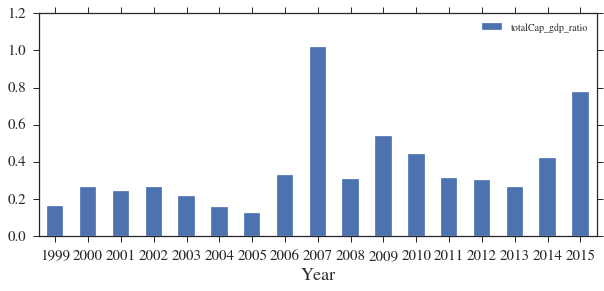

In [13]:
df_totalCap_gdp_ratio[['totalCap_gdp_ratio']].plot(kind='bar', rot=0, figsize=(10,4))

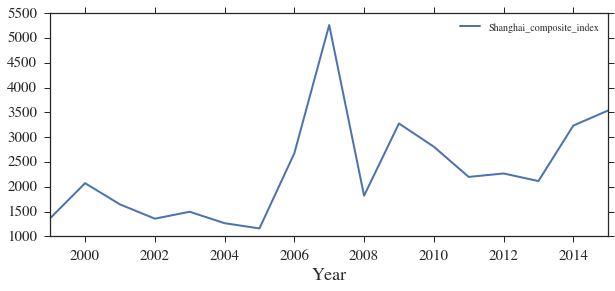

In [14]:
# Let's see a historical view of the closing price
df_totalCap_gdp_ratio['Shanghai_composite_index'].plot(legend=True, figsize=(10,4))

In [16]:
df_totalCap_gdp_ratio.iloc[8]

GDP                           27023.2300
GrowthRate                       14.2000
total_market_captalization    27566.3969
Shanghai_composite_index       5261.5600
totalCap_gdp_ratio                1.0201
Name: 2007, dtype: float64

In [18]:
df_totalCap_gdp_ratio.iloc[6]

GDP                           18731.8900
GrowthRate                       11.4000
total_market_captalization     2315.2616
Shanghai_composite_index       1161.0600
totalCap_gdp_ratio                0.1236
Name: 2005, dtype: float64

In the end of year 2007, Shanghai Composite Index reached the highest value of 5261.56 along with stock market capitalization to GDP ratio the highest value of 1.0201 (102.01%). While in the end of year 2005, Shanghai Composite Index reached the lowest value of 1161.06 along with stock market capitalization to GDP ratio the lowest value of 0.1236 (12.36%). 

In U.S stock market, a ratio of greater than 100% is said to show that the market is overvalued, while a value of around 50%, which is near the historical average for the U.S. market, is said to show undervaluation. The similar rule fits china stock market as well. Otherwise, the indicator to undervaluation in China stock market is different from that of around 50% in U.S stock market.

The linear regression analysis of stock market capitalization to GDP ratio and Shanghai Composite Index is ignored becanse of insufficient data points (16 points) to build a credible predictive model. 

### Q2 - Building linear regression model to predict daily returns of stock indices

The daily historical data of three indices from 28/08/2013 to current date is provided from web API https://github.com/waditu/tushare which is a utility for crawling historical data of China stocks. Let's build the connection to the API first.

In [19]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",6)
pd.set_option("display.width",78)
pd.set_option("precision",4)

#build the connection to web API
!pip install seaborn tushare  -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

In [22]:
!pip install patsy==0.4.1
import patsy
#ensure it is version '0.4.1'
patsy.__version__

#regression library
import statsmodels.formula.api as smf

from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,6
rcParams['font.size'] = 15

rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

Let us grab the data from web API and load them into dataframe, while saving the data into xls files for backup.

In [82]:
#tushare's URL: http://tushare.waditu.com/trading.html#id2
import tushare as tsh

stock_list = {"c_DJIA":"sz","c_SP500":"hs300","c_NASDAQ":"cyb"}

for stock,code in stock_list.items():
    globals()[stock] = tsh.get_hist_data(code,start="2013-08-28",end="2016-08-26")
    
#save to excel file
c_DJIA.to_excel("c_DJIA.xlsx",sheet_name="Sheet1")
c_SP500.to_excel("c_SP500.xlsx",sheet_name="Sheet1")
c_NASDAQ.to_excel("c_NASDAQ.xlsx",sheet_name="Sheet1")

#load data from excel file
c_DJIA = pd.read_excel("c_DJIA.xlsx","Sheet1",index_col="date",na_values=["NA"])
c_SP500 = pd.read_excel("c_SP500.xlsx","Sheet1",index_col="date",na_values=["NA"])
c_NASDAQ = pd.read_excel("c_NASDAQ.xlsx","Sheet1",index_col="date",na_values=["NA"])

The first dataset is a huge data about all prices of SSE 50 Index (referred as c_DJIA) from 2013 to 2016. The second dataset is a huge data about all prices of CSI 300 Index (referred as c_SP500) from 2013 to 2016. The third dataset is a huge data about all prices of Growth Enterprise Index (referred as c_NASDAQ) from 2013 to 2016.

In [83]:
c_DJIA_a = c_DJIA.sort_index(axis=0, ascending=True)
c_DJIA_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-09-02,8214.945,8269.821,8243.577,8148.172,1.3654e+07,41.096,0.50,8243.577,8243.577,8243.577,1.3654e+07,1.3654e+07,1.3654e+07
2013-09-03,8257.456,8374.313,8368.038,8245.006,1.4233e+07,124.461,1.51,8305.807,8305.807,8305.807,1.3944e+07,1.3944e+07,1.3944e+07
2013-09-04,8354.492,8400.811,8344.958,8330.524,1.4195e+07,-23.080,-0.28,8318.858,8318.858,8318.858,1.4028e+07,1.4028e+07,1.4028e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,10751.352,10815.256,10760.439,10732.921,1.8301e+08,10.146,0.09,10798.807,10750.884,10560.272,2.1110e+08,2.1918e+08,1.9472e+08
2016-08-25,10694.336,10699.246,10679.147,10564.363,2.0066e+08,-81.292,-0.76,10758.797,10779.703,10574.414,2.0038e+08,2.2123e+08,1.9383e+08
2016-08-26,10703.315,10785.005,10693.750,10675.597,1.8755e+08,14.603,0.14,10723.006,10796.268,10592.630,1.9486e+08,2.2299e+08,1.9480e+08


In [84]:
c_SP500_a = c_SP500.sort_index(axis=0, ascending=True)
c_SP500_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-09-02,2319.957,2329.867,2320.344,2297.449,79510248,6.434,0.28,2320.344,2320.344,2320.344,7.9510e+07,7.9510e+07,7.9510e+07
2013-09-03,2326.231,2354.856,2354.502,2321.304,80554008,34.158,1.47,2337.423,2337.423,2337.423,8.0032e+07,8.0032e+07,8.0032e+07
2013-09-04,2352.537,2360.663,2350.699,2345.437,78725760,-3.803,-0.16,2341.848,2341.848,2341.848,7.9597e+07,7.9597e+07,7.9597e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,3341.930,3348.129,3329.863,3323.725,81191432,-11.966,-0.36,3347.598,3341.030,3276.782,1.0888e+08,1.3175e+08,1.0796e+08
2016-08-25,3314.084,3315.081,3308.972,3279.806,100589152,-20.891,-0.63,3336.495,3348.591,3281.174,1.0052e+08,1.3170e+08,1.0735e+08
2016-08-26,3312.499,3328.945,3307.090,3301.735,81530688,-1.882,-0.06,3324.910,3349.877,3286.331,9.2837e+07,1.2823e+08,1.0703e+08


In [85]:
c_NASDAQ_a = c_NASDAQ.sort_index(axis=0, ascending=True)
c_NASDAQ_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-09-02,1179.321,1210.531,1210.185,1178.006,4.0631e+06,25.040,2.11,1210.185,1210.185,1210.185,4.0631e+06,4.0631e+06,4.0631e+06
2013-09-03,1217.772,1234.587,1234.587,1214.300,4.3839e+06,24.402,2.02,1222.386,1222.386,1222.386,4.2235e+06,4.2235e+06,4.2235e+06
2013-09-04,1233.497,1245.777,1236.350,1227.323,4.8224e+06,1.763,0.14,1227.041,1227.041,1227.041,4.4231e+06,4.4231e+06,4.4231e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,2178.527,2204.798,2192.170,2176.347,1.1939e+07,18.012,0.83,2187.976,2176.962,2150.664,1.0865e+07,1.1454e+07,1.0525e+07
2016-08-25,2179.014,2183.729,2180.660,2152.113,1.2364e+07,-11.510,-0.53,2183.789,2184.688,2152.710,1.0892e+07,1.1835e+07,1.0429e+07
2016-08-26,2186.004,2211.628,2189.749,2182.106,1.2325e+07,9.089,0.42,2180.827,2191.279,2156.077,1.1335e+07,1.2327e+07,1.0534e+07


Let us define a fuction to build a linear regression predictive model of two arrays/lists.

In [27]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]
    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

Let's see if we can predict the daily return of one stock index based on another stock index by linear regression model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     588.6
Date:                Wed, 31 Aug 2016   Prob (F-statistic):           8.20e-96
Time:                        10:11:34   Log-Likelihood:                -1258.0
No. Observations:                 732   AIC:                             2520.
Df Residuals:                     730   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0088      0.050      0.177      0.860        -0.089     0.107
x1             0.4913      0.020     24.262      0.000         0.452     0.531
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.604
Skew:                          -0.120   Prob(JB):                     2.08e-91
Kurtosis:                       6.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

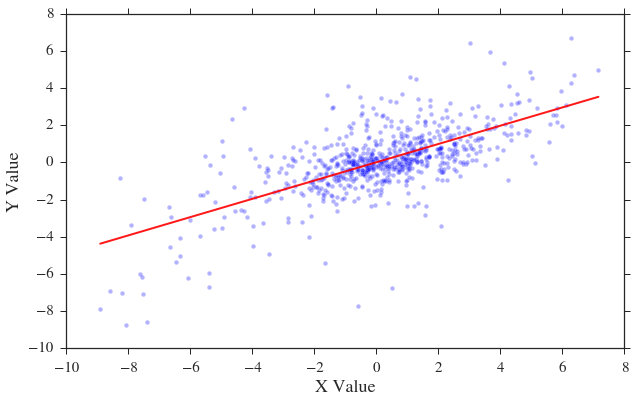

In [29]:
c_SP500_daily_return = c_SP500_a['p_change'].values
c_DJIA_daily_return = c_DJIA_a['p_change'].values
c_NASDAQ_daily_return = c_NASDAQ_a['p_change'].values
linreg(c_NASDAQ_daily_return, c_SP500_daily_return)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     1483.
Date:                Wed, 31 Aug 2016   Prob (F-statistic):          5.57e-178
Time:                        10:16:09   Log-Likelihood:                -1145.0
No. Observations:                 732   AIC:                             2294.
Df Residuals:                     730   BIC:                             2303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0194      0.043     -0.454      0.650        -0.104     0.065
x1             0.6683      0.017     38.511      0.000         0.634     0.702
==============================================================================
Omnibus:                       45.306   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.843
Skew:                          -0.003   Prob(JB):                     1.08e-38
Kurtosis:                       5.394   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

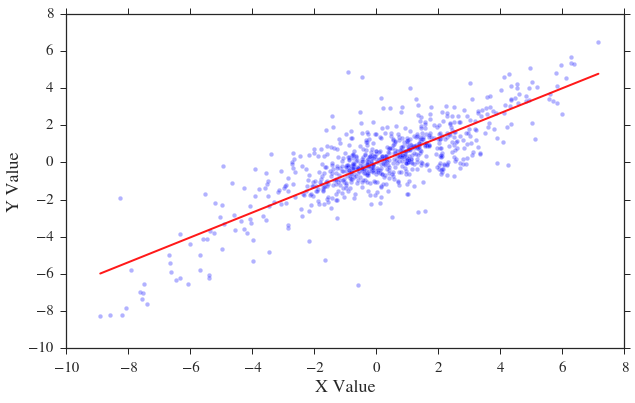

In [30]:
linreg(c_NASDAQ_daily_return, c_DJIA_daily_return)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     3938.
Date:                Wed, 31 Aug 2016   Prob (F-statistic):          2.52e-296
Time:                        11:00:55   Log-Likelihood:                -795.40
No. Observations:                 732   AIC:                             1595.
Df Residuals:                     730   BIC:                             1604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0176      0.027      0.663      0.507        -0.035     0.070
x1             0.8274      0.013     62.750      0.000         0.801     0.853
==============================================================================
Omnibus:                      152.665   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.553
Skew:                           0.620   Prob(JB):                         0.00
Kurtosis:                       9.958   Cond. No.                         2.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

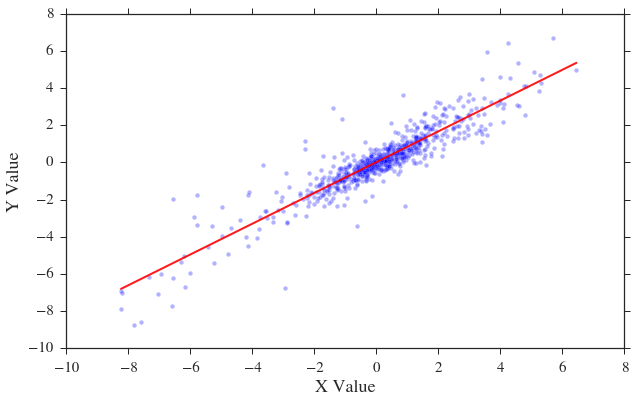

In [32]:
linreg(c_DJIA_daily_return, c_SP500_daily_return)

From these three ordinary-least-square (OLS) regression result, we can conclude that the regression model based on daily returns of c_SP500 and c_DJIA has the best outcome because the result shows highest Adj.R-squared (0.844), lowest Prob (F-statistic) (2.52e-296), lowest AIC/BIC (1595/1604), highest Omnibus (152.665) and highest Jarque-Bera (JB) (1523.553). Now that we see there are closest relationship between c_SP500 price change as the predictor and c_DJIA daily return as the response variable. This finding can be useful when we invest money on c_DJIA index based on c_SP500 price change every day especially given that c_SP500 index has its corssponding futures (CSI 300 index future). The underlying asset of the CSI 300 index futures contract is CSI 300 index (c_SP500), which means that CSI 300 index futures price change could indicate c_SP500 index price change to some extent, and predict the c_DJIA index daily return based on our built predictive model. 

The **regression line is an estimation** of where the true model parameters should lie. Sometimes we would like to know what is the the **region in which the true model parameters lie given a certain confidence value**. For this we can define a confidence interval. The confidence interval lets us define a window in which the true regression line is likely to be situated for example with a 95% confidence. For linear regression we can visually display a confidence interval in which we expect the true value to lie. 

In [33]:
## Grab all the price changes for the stock indices list into one DataFrame
df_daily_returns = pd.DataFrame({
        'c_DJIA': c_DJIA_a.p_change, 'c_SP500': c_SP500_a.p_change, 'c_NASDAQ': c_NASDAQ_a.p_change
    },index = c_DJIA_a.index)
df_daily_returns

,c_DJIA,c_NASDAQ,c_SP500
date,,,
2013-09-02,0.50,2.11,0.28
2013-09-03,1.51,2.02,1.47
2013-09-04,-0.28,0.14,-0.16
...,...,...,...
2016-08-24,0.09,0.83,-0.36
2016-08-25,-0.76,-0.53,-0.63
2016-08-26,0.14,0.42,-0.06


In [34]:
import scipy

def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),1000)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of data point's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

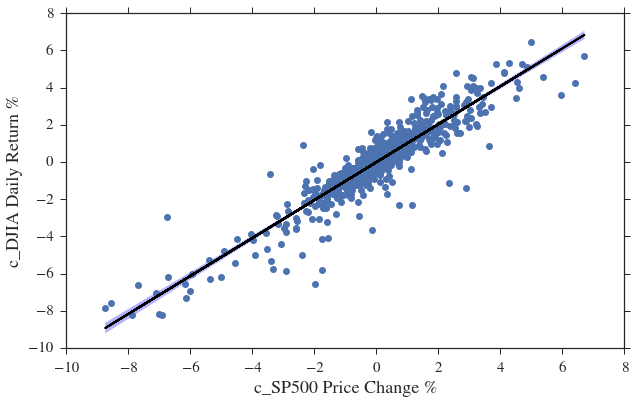

In [36]:
yl,yu,xd = linregress_CIs(df_daily_returns.c_SP500.as_matrix(),df_daily_returns.c_DJIA.as_matrix(), .95)
mod = smf.ols(formula='c_DJIA ~ 1 + c_SP500', data=df_daily_returns).fit()

plt.xlabel('c_SP500 Price Change %')
plt.ylabel('c_DJIA Daily Return %')
plt.plot(df_daily_returns.c_SP500, df_daily_returns.c_DJIA, 'o')
plt.plot(df_daily_returns.c_SP500, mod.params[1]*df_daily_returns.c_SP500 + mod.params[0], 'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue', edgecolor='none')
plt.show()
#mod.summary()

The blue area is a 95% confidence interval on the line. The curved lines are the boundaries of all possible straight lines that could be fit within this confidence interval. Given the assumptions of linear regression, **we can be 95% confident that the two curved confidence bands enclose the true best-fit linear regression line**, leaving a 5% chance that the true line is outside those boundaries.
Another way of thinking about this is that our result, can be estimated with a 95% chance of lying in this range.

The **prediction bands identify the region that specifies where a given percentage of points should fall**. The **prediction band** deals specifically with where the **predictions** should fall, while the **confidence intervals** define where the true **regression line** should fall. Let us draw 95% prediction bands for the prediction model based on c_SP500 price change and c_DJIA daily return and caculate the RMSE for this model.

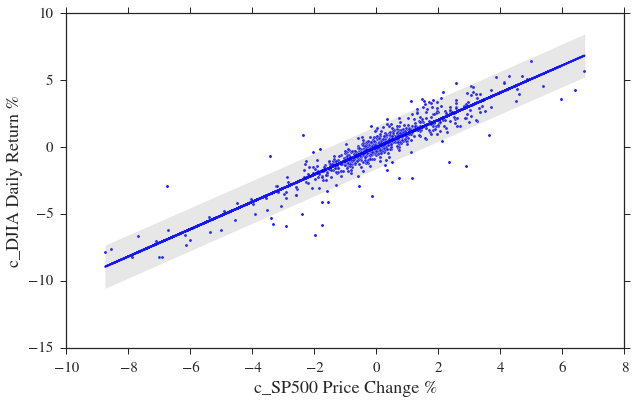

In [37]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#generate the model
mod = smf.ols(formula='c_DJIA ~ 1 + c_SP500', data=df_daily_returns).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(df_daily_returns.c_SP500.min(), df_daily_returns.c_SP500.max(), len(df_daily_returns.c_SP500))
x_pred2 = sm.add_constant(x_pred)

#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

#plot points and confidence window
plt.scatter(df_daily_returns.c_SP500, df_daily_returns.c_DJIA, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(df_daily_returns.c_SP500, mod.predict(df_daily_returns[['c_SP500']]), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('c_SP500 Price Change %')
plt.ylabel('c_DJIA Daily Return %')

In [55]:
# mse_total: Total mean squared error. 
# Defined as the uncentered total sum of squares divided by n the number of observations.
RMSE = np.sqrt(mod.mse_total)
RMSE

2.0147629891773406

Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the daily returns of c_DJIA of won't vary more than 2 times the RMSE 95% of the time. Thus we can reasonably expect a daily return of c_DJIA to be within 4.03% of our line fit. 

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. Let us visualise the residuals in respect to the response variable, in oder to inspect the normality of their distribution and unusual shapes which might be indicative of non-normality.

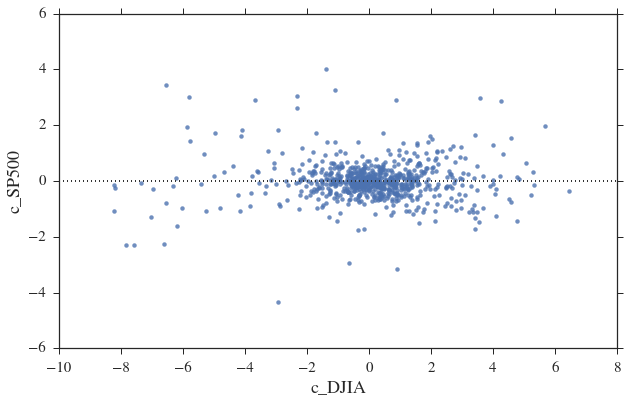

In [45]:
# Residual plot of all the dataset using seaborn
sns.residplot('c_DJIA', 'c_SP500', data = df_daily_returns)

This scatter plot shows the distribution of the residuals and indicates that 68% of the residuals can be expected to fall within $1 \pm$RMSE, meanwhile 95% can be expected to fall within $2 \pm$RMSE. And anyone who has performed ordinary least squares (OLS) regression analysis should know that he/she needs to check the residual plots in order to validate his/her model. 
http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis

### Q3 - Building polynomial  and multiple linear regression model to predict daily returns of stock indices

A very popular regression technique is [Polynomial Regression](http://en.wikipedia.org/wiki/Polynomial_regression) (a special case of multiple linear regression), a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. Using higher order polynomial comes at a price, however. First, the computational complexity of model fitting grows as the number of adaptable parameters grows. Second, more complex models have a higher risk of **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

We have bulit the linear regression model successfully based on daily returns of c_SP500 and c_DJIA. And the linear regression model based on daily returns of c_NASDAQ and c_SP500 has the worst outcome.
Next, we will try to build polynomial regression model based on daily returns of c_NASDAQ and c_SP500 to improve the performance.

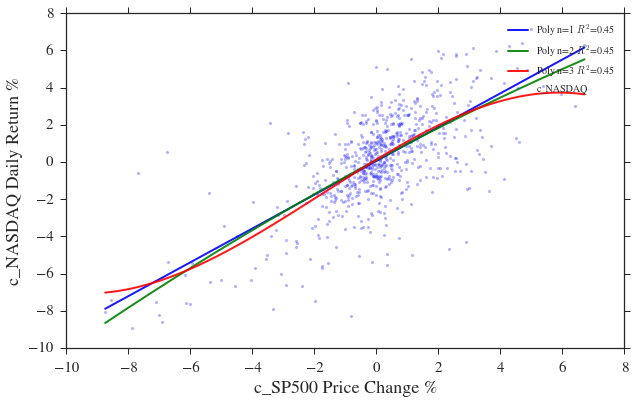

In [46]:
plt.scatter(df_daily_returns.c_SP500, df_daily_returns.c_NASDAQ, s=10, alpha=0.3)
plt.xlabel('c_SP500 Price Change %')
plt.ylabel('c_NASDAQ Daily Return %')

# points linearlyd space on lstats
x = pd.DataFrame({'c_SP500': np.linspace(df_daily_returns.c_SP500.min(), df_daily_returns.c_SP500.max(), len(df_daily_returns.c_SP500)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='c_NASDAQ ~ 1 + c_SP500', data=df_daily_returns).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='c_NASDAQ ~ 1 + c_SP500 + I(c_SP500 ** 2.0)', data=df_daily_returns).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='c_NASDAQ ~ 1 + c_SP500 + I(c_SP500 ** 2.0) + I(c_SP500 ** 3.0)', data=df_daily_returns).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

In [52]:
# mse_total: Total mean squared error. 
# Defined as the uncentered total sum of squares divided by n the number of observations.
RMSE_poly_1 = np.sqrt(poly_1.mse_total)
RMSE_poly_1

2.4679018670013142

In [53]:
RMSE_poly_2 = np.sqrt(poly_2.mse_total)
RMSE_poly_2

2.4679018670013142

In [51]:
RMSE_poly_3 = np.sqrt(poly_3.mse_total)
RMSE_poly_3

2.4679018670013142

The polynomial regression model based on daily returns of c_NASDAQ and c_SP500 does not improve the performance comparing to the linear regression model in terms of $R^2$ value and RMSE.

We could try to build multiple linear regression model to predict the daily return of c_NASDAQ based on daily returns of c_SP500 and c_DJIA and check whether we could improve the performance or not.

In [54]:
multi_linear = smf.ols(formula='c_NASDAQ ~ 1 + c_DJIA + c_SP500', data=df_daily_returns).fit()
print multi_linear.params[0:3]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept    0.0715
c_DJIA       1.6053
c_SP500     -0.7283
dtype: float64
R-Squared:  0.715001879789


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               c_NASDAQ   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     914.5
Date:                Wed, 31 Aug 2016   Prob (F-statistic):          1.95e-199
Time:                        15:35:09   Log-Likelihood:                -1240.0
No. Observations:                 732   AIC:                             2486.
Df Residuals:                     729   BIC:                             2500.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0715      0.049      1.466      0.143        -0.024     0.167
c_DJIA         1.6053      0.061     26.212      0.000         1.485     1.726
c_SP500       -0.7283      0.068    -10.712      0.000        -0.862    -0.595
==============================================================================
Omnibus:                       41.228   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.651
Skew:                          -0.288   Prob(JB):                     2.30e-22
Kurtosis:                       4.714   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The multiple linear regression model to predict the daily return of c_NASDAQ based on daily returns of c_SP500 and c_DJIA does improve the performance comparing to the linear regression model and polynomial regression model in terms of Adj.R-squared(higer), lowest Prob (F-statistic)(lower), AIC/BIC(lower), Omnibus(higher) and Jarque-Bera (JB)(higher). 

### Q4 - Building kNN regressor model to predict daily returns of stock indices

The algorithm we will use is called **k-nearest neighbors (kNN)**. kNN is a curious ML algorithm as it **does not require us to explicitly build a model**. The data itself is the model. kNN is referred to as an instance-based learning algorithm, or a lazy learning algorithm as it does no computation until a classification is required. It is useful as it can be used in both regression (continuous value prediction) or classification (class label prediction) problems. In our case, we will use kNN regressor to **daily returns of c_DJIA index** based on the instances of **daily returns of c_SP500 index**. And we will compare the outputs generated by linear regression model and kNN regressor model.

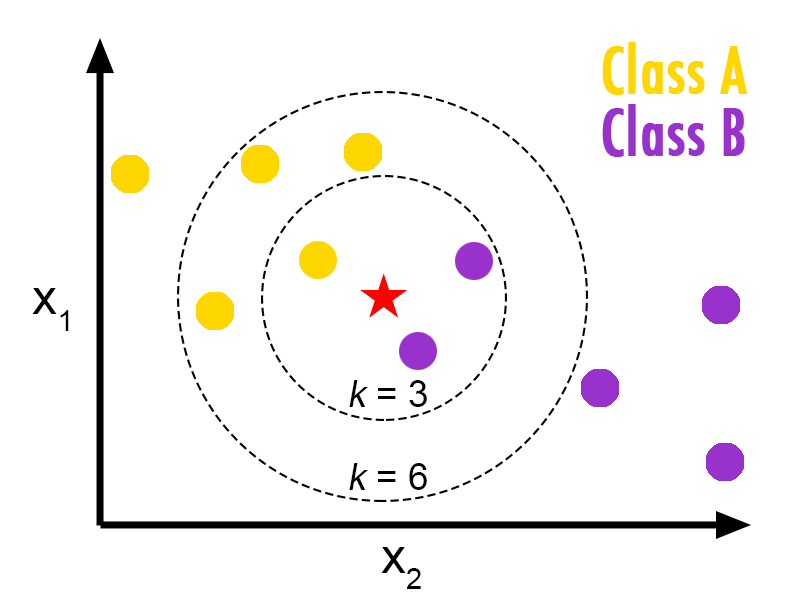

In [92]:
from IPython.display import Image
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)

In [73]:
from sklearn import neighbors
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [74]:
X = c_SP500_a.p_change.values
X = np.reshape(X, (len(c_SP500_a.p_change), 1))
y = c_DJIA_a.p_change.values
y = np.reshape(y, (len(c_DJIA_a.p_change), 1))

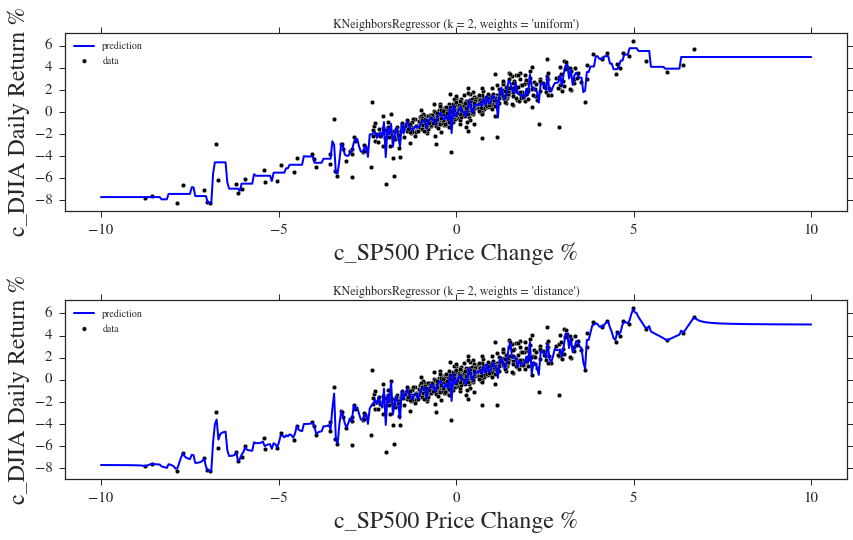

In [75]:
# Fit regression model
x = np.linspace(-10, 10, 400)[:, np.newaxis]
n_neighbors = 2

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_hat = knn.fit(X, y).predict(x)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(x, y_hat, c='b', label='prediction')
    plt.axis('tight')
    plt.xlabel('c_SP500 Price Change %')
    plt.ylabel('c_DJIA Daily Return %')
    plt.legend(loc='upper left')
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.subplots_adjust( hspace=0.5)
    
plt.show()

Let us define a method that calculates the $R^2$ and the RMSE measures of kNN regressor model.

In [78]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

Let us inspect the performance of the built kNN regressor model above with 2 nearest **non-weighted** neighbours. Note that the default distance matrix (resemblance measure) in scikit learn is minkowski distance.

In [88]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform')
mod = knn.fit(X, y)
x = X
y_hat = mod.predict(x)
calculate_regression_goodness_of_fit(y, y_hat)

(0.9287254176560964, 0.63666196390561369)

Let us inspect the performance of the built kNN regressor model above with 2 nearest **weighted** neighbours. Note that the default distance matrix (resemblance measure) in scikit learn is minkowski distance.

In [90]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')
mod = knn.fit(X, y)
x = X
y_hat = mod.predict(x)
calculate_regression_goodness_of_fit(y, y_hat)

(0.96142508828657325, 0.50790674566802352)

We can see that kNN regressor model above with **weighted** neighbours will improve the performance/accuracy in terms of higher $R^2$ value and lower RMSE value. Let us try different distance matrix (euclidean distance) to measure the resemblance.

In [96]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance', metric='euclidean')
mod = knn.fit(X, y)
x = X
y_hat = mod.predict(x)
calculate_regression_goodness_of_fit(y, y_hat)

(0.96142508828657325, 0.50790674566802352)

Besides euclidean distance, other distance metrics will get the same accuracy measures in terms of  $R^2$ and RMSE. Varying the distance metric will not make any difference since we are only using one dimension. However, varying the value of k will make a big difference to the model. We will now see how we can empirically determine what is the best value of k for this dataset. For this, we will use the RMSE and the $R^2$ metrics.

Let us re-train the model with different values of k, beginning with 2 to the size of the dataset, and inspect the effect that varying k has on the **accuracy measures** in terms of **RMSE** and the **$R^2$** metrics.

In [80]:
rsquare_arr = []
rmse_arr = []

for k in range(2, len(y)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)
    rsquare_arr.append(rsquare)
    
#len(y)
#len(rsquare_arr)

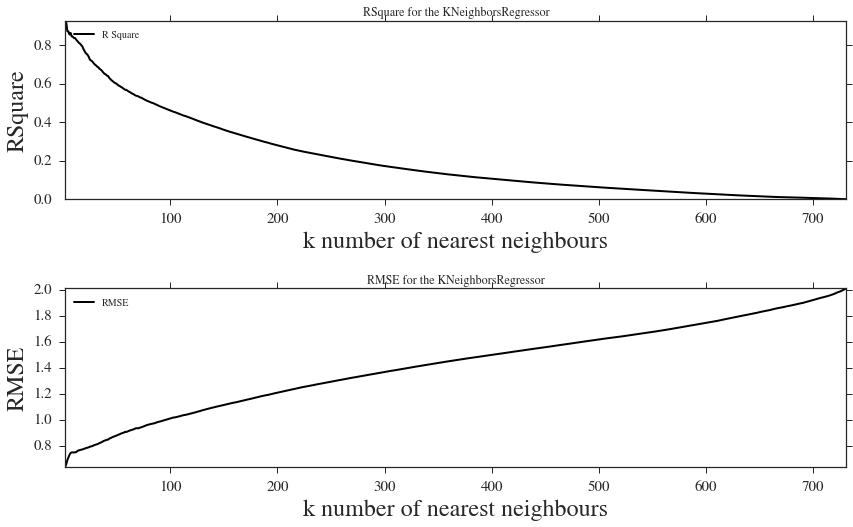

In [81]:
plt.subplot(2, 1, 1)
plt.plot(range(2, len(rsquare_arr)+2), rsquare_arr, c='k', label='R Square')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RSquare')
plt.legend(loc='upper left')
plt.title("RSquare for the KNeighborsRegressor")
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(range(2, len(rsquare_arr)+2), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")

We can see that kNN regressor model to predict daily returns of c_DJIA index based on c_SP500 price change with **least weighted** neighbours (k=2) will get the highest performance/accuracy in terms of higher $R^2$ value and lower RMSE value.

### Coclusion

#### Key Findings

1. In U.S stock market, the stock market capitalization to GDP ratio of greater than 100% is said to show that the market is overvalued, while a value of around 50%, which is near the historical average for the U.S. market, is said to show undervaluation. The similar rule fits china stock market as well. Otherwise, the indicator to undervaluation in China stock market is different from that of around 50% in U.S stock market.

2. There is closest relationship between c_SP500 price change as the predictor and c_DJIA daily return as the response variable. This finding can be useful when we invest money on c_DJIA index based on c_SP500 price change every day especially given that c_SP500 index has its corssponding futures (CSI 300 index future). The underlying asset of the CSI 300 index futures contract is CSI 300 index (c_SP500), which means that CSI 300 index futures price change could indicate c_SP500 index price change to some extent, and predict the c_DJIA index daily return based on our built predictive model.

3. We use prediction bands to depict the variation in our data. Meanwhile, we use confidence intervals to visually analyze how precisely our data define the best-fit line. The prediction band deals specifically with where the predictions should fall, while the confidence intervals define where the true regression line should fall.

4. The polynomial regression model based on daily returns of c_NASDAQ and c_SP500 does not improve the performance comparing to the linear regression model in terms of $R^2$ value and RMSE.

5. The multiple linear regression model to predict the daily return of c_NASDAQ based on daily returns of c_SP500 and c_DJIA improves the performance comparing to the linear regression model and polynomial regression model in terms of Adj.R-squared(higer), lowest Prob (F-statistic)(lower), AIC/BIC(lower), Omnibus(higher) and Jarque-Bera (JB)(higher). 

6. We can see that kNN regressor model to predict daily returns of c_DJIA index based on c_SP500 price change with least weighted neighbours (k=2) will get the highest performance/accuracy in terms of higher $R^2$ value and lower RMSE value.

#### Discussion

1. Anyone who has performed ordinary least squares (OLS) regression analysis should know that he/she needs to check the residual plots in order to validate his/her model.

2. Validating a model’s out-of-sample (test set) forecasting performance is much better than measuring the in-sample (training set) $R^2$ value. However, if we're going to do it, we need to specify additional assumptions that make explicit our ignorance about what happens outside the data range.

In [97]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>